In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_dir = "C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/cifar10_dataset/cifar10_dataset/cifar10_dataset"

# Set up the image data generator with a validation split
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [5]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),  # Resize images to CIFAR-10 dimensions
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

Found 43456 images belonging to 10 classes.


In [6]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)


Found 10863 images belonging to 10 classes.


In [7]:
model = Sequential()

# Flatten the 32x32x3 images into a 1D vector of 3072 (32*32*3)
model.add(Flatten(input_shape=(32, 32, 3)))

# Add a fully connected layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Add another fully connected layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# Add another fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (for each class) and softmax activation
model.add(Dense(train_generator.num_classes, activation='softmax'))


C:\Users\Nanda Kisore Biswas\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_generator, epochs=1, validation_data=validation_generator)

C:\Users\Nanda Kisore Biswas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


679/679 ━━━━━━━━━━━━━━━━━━━━ 2408s 4s/step - accuracy: 0.2758 - loss: 1.9819 - val_accuracy: 0.3953 - val_loss: 1.6767


In [10]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.3895 - loss: 1.6854
Test accuracy: 0.3952867388725281


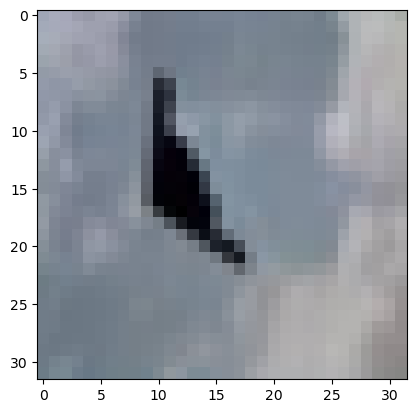

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: airplane


In [12]:
class_labels = list(train_generator.class_indices.keys())
n = 5  # Index of the image to visualize
X_test, y_test = next(validation_generator)  # Get a batch of validation images
plt.imshow(X_test[n])
plt.show()
cifars = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predicted_value = model.predict(X_test)
pred = np.argmax(predicted_value[n])
idx =(int) (class_labels[pred])
print('Prediction:', cifars[idx] )